In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('BMI.csv')
df.head(10)

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2
5,59,1.71,79.32,27.126295,Overweight
6,59,1.70,73.32,25.370242,Overweight
7,59,1.72,85.32,28.839913,Overweight
8,59,1.46,36.00,16.888722,Underweight
9,59,1.83,104.70,31.263997,Obese Class 1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [4]:
df['BmiClass'].unique()

array(['Obese Class 1', 'Overweight', 'Underweight', 'Obese Class 2',
       'Obese Class 3', 'Normal Weight'], dtype=object)

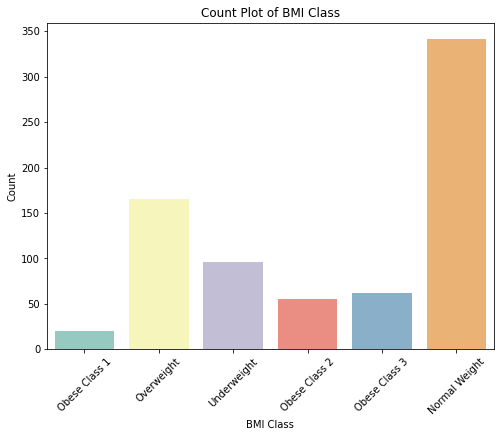

In [5]:
# Create a count plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=df, x='BmiClass', palette='Set3')
plt.title('Count Plot of BMI Class')
plt.xlabel('BMI Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

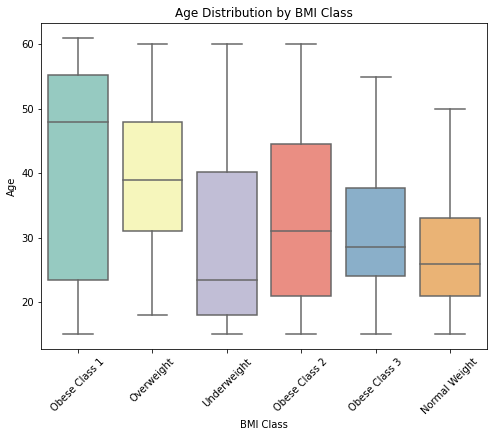

In [6]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(data=df, x='BmiClass',y='Age', palette='Set3')
plt.title('Age Distribution by BMI Class')
plt.xlabel('BMI Class')
plt.ylabel('Age')
plt.xticks(rotation=45)

# Show the plot
plt.show()

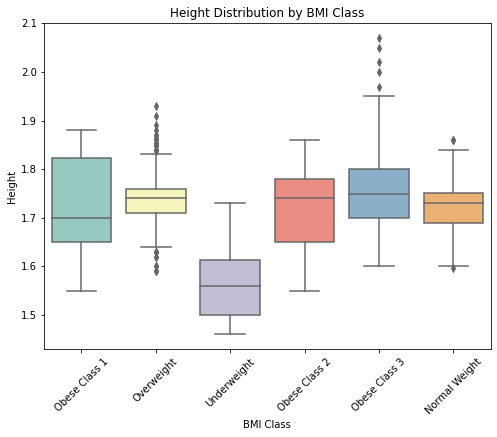

In [7]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(data=df, x='BmiClass',y='Height', palette='Set3')
plt.title('Height Distribution by BMI Class')
plt.xlabel('BMI Class')
plt.ylabel('Height')
plt.xticks(rotation=45)

# Show the plot
plt.show()

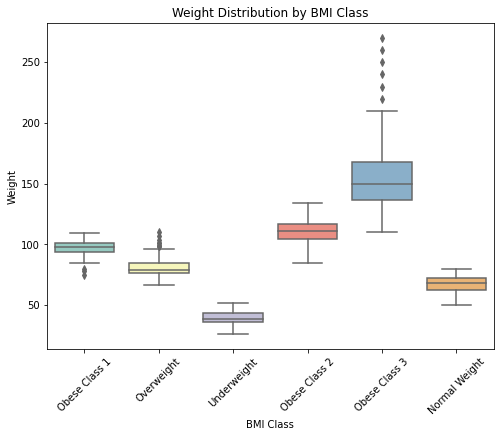

In [8]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(data=df, x='BmiClass',y='Weight', palette='Set3')
plt.title('Weight Distribution by BMI Class')
plt.xlabel('BMI Class')
plt.ylabel('Weight')
plt.xticks(rotation=45)

# Show the plot
plt.show()

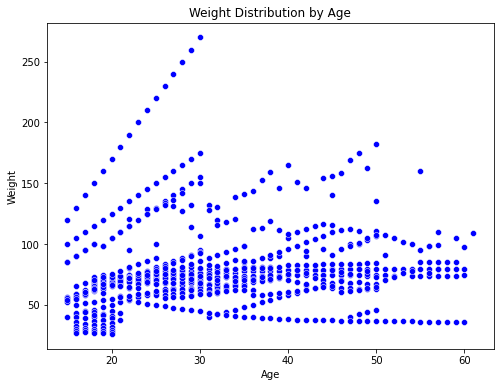

In [9]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.scatterplot(data=df, x='Age',y='Weight',marker='o', color='b', palette='Set3')
plt.title('Weight Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Weight')

# Show the plot
plt.show()

In [10]:
encoder=ce.BinaryEncoder(cols=['BmiClass'])
encoder

BinaryEncoder(base=2, cols=['BmiClass'], drop_invariant=False,
              handle_missing='value', handle_unknown='value', mapping=None,
              return_df=True, verbose=0)

In [11]:
df_encoded=encoder.fit_transform(df)

In [12]:
encoder

BinaryEncoder(base=2, cols=['BmiClass'], drop_invariant=False,
              handle_missing='value', handle_unknown='value',
              mapping=[{'col': 'BmiClass',
                        'mapping':     BmiClass_0  BmiClass_1  BmiClass_2
 1           0           0           1
 2           0           1           0
 3           0           1           1
 4           1           0           0
 5           1           0           1
 6           1           1           0
-1           0           0           0
-2           0           0           0}],
              return_df=True, verbose=0)

In [13]:
df_encoded

,Age,Height,Weight,Bmi,BmiClass_0,BmiClass_1,BmiClass_2
0,61,1.85,109.30,31.935720,0,0,1
1,60,1.71,79.02,27.023700,0,1,0
2,60,1.55,74.70,31.092612,0,0,1
3,60,1.46,35.90,16.841809,0,1,1
4,60,1.58,97.10,38.896010,1,0,0
...,...,...,...,...,...,...,...
736,34,1.86,95.70,27.662157,0,1,0
737,44,1.91,106.90,29.302925,0,1,0
738,25,1.82,88.40,26.687598,0,1,0
739,35,1.88,98.50,27.868945,0,1,0


In [14]:
binary_column_names=['BmiClass_0','BmiClass_1','BmiClass_2']
df_encoded['Encoded BMI Class'] = df_encoded[binary_column_names].apply(lambda row: ''.join(map(str, row)), axis=1)

In [15]:
df_encoded.drop(['BmiClass_0','BmiClass_1','BmiClass_2'],axis=1,inplace=True)

In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                741 non-null    int64  
 1   Height             741 non-null    float64
 2   Weight             741 non-null    float64
 3   Bmi                741 non-null    float64
 4   Encoded BMI Class  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [17]:
df_encoded

,Age,Height,Weight,Bmi,Encoded BMI Class
0,61,1.85,109.30,31.935720,001
1,60,1.71,79.02,27.023700,010
2,60,1.55,74.70,31.092612,001
3,60,1.46,35.90,16.841809,011
4,60,1.58,97.10,38.896010,100
...,...,...,...,...,...
736,34,1.86,95.70,27.662157,010
737,44,1.91,106.90,29.302925,010
738,25,1.82,88.40,26.687598,010
739,35,1.88,98.50,27.868945,010


In [18]:
x=df_encoded.drop('Encoded BMI Class',axis=1)
y=df_encoded['Encoded BMI Class']
print(x)
print(y)

     Age  Height  Weight        Bmi
0     61    1.85  109.30  31.935720
1     60    1.71   79.02  27.023700
2     60    1.55   74.70  31.092612
3     60    1.46   35.90  16.841809
4     60    1.58   97.10  38.896010
..   ...     ...     ...        ...
736   34    1.86   95.70  27.662157
737   44    1.91  106.90  29.302925
738   25    1.82   88.40  26.687598
739   35    1.88   98.50  27.868945
740   45    1.93  109.90  29.504148

[741 rows x 4 columns]
0      001
1      010
2      001
3      011
4      100
      ... 
736    010
737    010
738    010
739    010
740    010
Name: Encoded BMI Class, Length: 741, dtype: object


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(592, 4)
(149, 4)
(592,)
(149,)


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Make predictions
dt_y_pred = model.predict(x_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(dt_y_pred)
print(dt_accuracy)

['011' '110' '011' '110' '110' '010' '110' '011' '011' '010' '010' '110'
 '110' '110' '100' '110' '110' '010' '110' '010' '001' '010' '110' '110'
 '110' '110' '110' '110' '010' '110' '110' '110' '101' '110' '100' '110'
 '110' '001' '011' '110' '110' '110' '110' '110' '011' '110' '110' '011'
 '100' '011' '110' '001' '110' '010' '100' '010' '011' '010' '011' '110'
 '110' '110' '011' '010' '110' '110' '110' '110' '010' '110' '100' '110'
 '110' '101' '110' '010' '010' '110' '110' '110' '010' '011' '011' '011'
 '100' '110' '101' '010' '110' '110' '110' '010' '010' '011' '101' '110'
 '011' '011' '110' '010' '101' '011' '101' '101' '011' '110' '110' '010'
 '110' '110' '110' '110' '100' '100' '110' '011' '110' '010' '100' '101'
 '110' '010' '010' '001' '110' '110' '110' '110' '110' '011' '010' '100'
 '010' '110' '010' '010' '110' '110' '010' '110' '010' '110' '110' '110'
 '101' '110' '010' '010' '110']
0.9932885906040269


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Make predictions
rfc_y_pred = model.predict(x_test)

# Calculate accuracy
rfc_accuracy = accuracy_score(y_test, rfc_y_pred)

print(rfc_y_pred)
print(rfc_accuracy)

['011' '110' '011' '110' '110' '010' '110' '011' '011' '010' '010' '110'
 '110' '110' '100' '110' '110' '010' '110' '010' '001' '010' '110' '110'
 '110' '110' '110' '110' '010' '110' '110' '110' '101' '110' '100' '110'
 '110' '001' '011' '110' '110' '110' '110' '110' '011' '110' '110' '011'
 '100' '011' '110' '001' '110' '010' '100' '010' '011' '010' '011' '110'
 '110' '110' '011' '010' '110' '110' '110' '110' '010' '110' '100' '110'
 '110' '101' '110' '010' '010' '110' '110' '110' '010' '011' '011' '011'
 '100' '110' '101' '010' '110' '110' '110' '010' '010' '011' '101' '110'
 '011' '011' '110' '010' '101' '011' '101' '101' '011' '110' '110' '010'
 '110' '110' '110' '110' '100' '100' '110' '011' '110' '010' '100' '101'
 '110' '010' '010' '001' '110' '110' '110' '110' '110' '011' '010' '100'
 '010' '110' '010' '010' '110' '110' '010' '110' '010' '110' '110' '110'
 '101' '110' '010' '010' '110']
0.9932885906040269


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create and train the model
model = SVC()
model.fit(x_train, y_train)

# Make predictions
svc_y_pred = model.predict(x_test)

# Calculate accuracy
svc_accuracy = accuracy_score(y_test, svc_y_pred)

print(svc_y_pred)
print(svc_accuracy)

['011' '110' '011' '110' '110' '110' '110' '011' '011' '010' '010' '110'
 '110' '110' '010' '110' '110' '110' '010' '010' '010' '010' '110' '110'
 '110' '110' '110' '110' '010' '110' '110' '110' '100' '110' '100' '110'
 '110' '100' '110' '110' '110' '110' '110' '110' '011' '110' '110' '011'
 '100' '011' '110' '100' '110' '010' '100' '110' '011' '010' '011' '110'
 '110' '110' '011' '110' '110' '110' '110' '110' '010' '110' '100' '110'
 '110' '101' '110' '010' '010' '110' '110' '110' '010' '110' '011' '011'
 '100' '110' '101' '110' '110' '110' '110' '110' '010' '011' '101' '110'
 '011' '011' '110' '010' '101' '011' '101' '101' '011' '110' '010' '010'
 '110' '110' '110' '110' '101' '100' '110' '011' '110' '110' '100' '100'
 '110' '110' '010' '010' '110' '110' '110' '110' '110' '011' '010' '100'
 '110' '110' '010' '010' '110' '110' '010' '110' '010' '110' '110' '110'
 '101' '110' '010' '010' '110']
0.8590604026845637


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
model = KNeighborsClassifier()
model.fit(x_train, y_train)

# Make predictions
knn_y_pred = model.predict(x_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)

print(knn_y_pred)
print(knn_accuracy)

['011' '110' '011' '110' '110' '110' '110' '011' '011' '010' '010' '110'
 '110' '110' '001' '110' '110' '110' '110' '010' '001' '010' '110' '110'
 '110' '110' '110' '110' '110' '110' '110' '110' '100' '110' '100' '110'
 '110' '010' '011' '110' '110' '110' '110' '110' '011' '110' '110' '011'
 '100' '011' '110' '010' '110' '010' '100' '010' '011' '010' '011' '110'
 '110' '110' '011' '110' '110' '110' '110' '110' '010' '110' '100' '110'
 '110' '101' '110' '010' '010' '110' '110' '110' '010' '110' '011' '011'
 '001' '110' '101' '010' '110' '110' '110' '010' '010' '011' '101' '110'
 '011' '011' '110' '010' '101' '011' '101' '100' '011' '110' '110' '010'
 '110' '110' '110' '110' '100' '100' '110' '011' '110' '010' '100' '100'
 '110' '110' '110' '010' '110' '110' '110' '110' '110' '011' '010' '100'
 '110' '110' '010' '010' '010' '110' '010' '110' '010' '110' '110' '110'
 '101' '110' '010' '010' '110']
0.8791946308724832


In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
base_model = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_model, n_estimators=50)
model.fit(x_train, y_train)

# Make predictions
ada_y_pred = model.predict(x_test)

# Calculate accuracy
ada_accuracy = accuracy_score(y_test, ada_y_pred)

print(ada_y_pred)
print(ada_accuracy)

['011' '110' '011' '110' '110' '010' '110' '011' '011' '010' '010' '110'
 '110' '110' '010' '110' '110' '010' '110' '010' '010' '010' '110' '110'
 '110' '110' '110' '110' '010' '110' '110' '110' '101' '110' '010' '110'
 '110' '010' '011' '110' '110' '110' '110' '110' '011' '110' '110' '011'
 '010' '011' '110' '010' '110' '010' '010' '010' '011' '010' '011' '110'
 '110' '110' '011' '010' '110' '110' '110' '110' '010' '110' '010' '110'
 '110' '101' '110' '010' '010' '110' '110' '110' '010' '011' '011' '011'
 '010' '110' '101' '010' '110' '110' '110' '010' '010' '011' '101' '110'
 '011' '011' '110' '010' '101' '011' '101' '101' '011' '110' '110' '010'
 '110' '110' '110' '110' '010' '010' '110' '011' '110' '010' '010' '101'
 '110' '010' '010' '010' '110' '110' '110' '110' '110' '011' '010' '010'
 '010' '110' '010' '010' '110' '110' '010' '110' '010' '110' '110' '110'
 '101' '110' '010' '010' '110']
0.9060402684563759
